So far, we have learned two types of complexity of algorithms. In the first file, we learned about

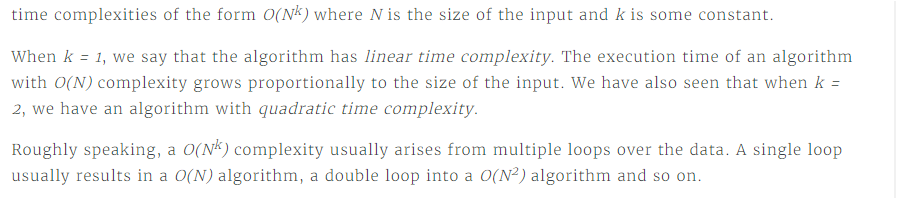

Then, in the second file, we learned about constant time complexity. These are algorithms whose execution time is independent from the input. These often arise from mathematical formulas or as methods from some data structures such as `list.append()`. For example, an algorithm for computing the average between two numbers is a constant time algorithm:

`def average(a, b):
    return (a + b) / 2`
    
The `list.len()` method is an example of a constant time method. The list keeps track of the number of elements it contains and returns this number without having to iterate over its contents to count it.

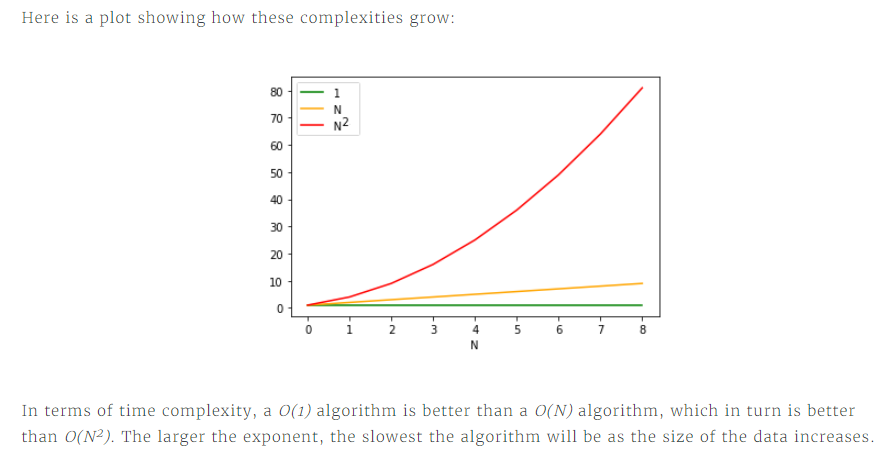

In this file, we will explore a new time of complexity: the **logarithmic time complexity**. These algorithms are much faster than linear time algorithms but are not constant time algorithms. Their complexity lies between constant time complexity and linear time complexity.

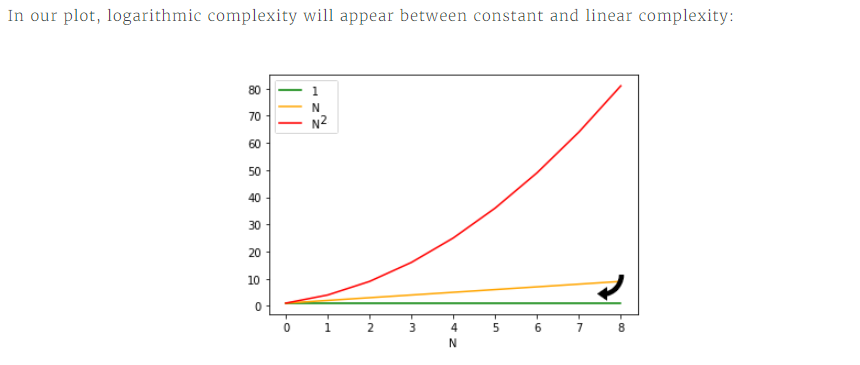

**Task**

Five functions are provided together with four possible complexities. Our goal is to identify the correct complexity of each of them.

**Answer**

In [1]:
# proposed complexities
constant_complexity  = "O(1)"
linear_complexity    = "O(N)"
quadratic_complexity = "O(N^2)"
cubic_complexity     = "O(N^3)"

# functions
def function1(N):
    for i in range(N):
        print(i)

def function2(N):
    for i in range(N):
        for j in range(N):
            for k in range(N):
                print(i, j, k)

def function3(N):
    for i in range(10000):
        print(i)

def function4(N):
    for i in range(N):
        for j in range(N):
            for k in range(10):
                print(i, j, k)
            
def function5(N):
    for i in range(N):
        for j in range(10000):
            print(i, j)

# Add our answers below
def function1(N):
    for i in range(N): # N
        print(i)       # N
# function1 is O(N)

def function2(N):
    for i in range(N):         # N
        for j in range(N):     # N^2
            for k in range(N): # N^3
                print(i, j, k) # N^3
# function2 is O(N^3)

def function3(N):
    for i in range(10000): # 10000
        print(i)           # 10000
# function3 is O(1)

def function4(N):
    for i in range(N):          # N
        for j in range(N):      # N^2
            for k in range(10): # 10*N^2
                print(i, j, k)      # 10*N^2   
# function4 is O(N^2)       
    
def function5(N):
    for i in range(N):         # N
        for j in range(10000): # 10000*N
            print(i, j)        # 10000*N
# function5 is O(N)

answer1 = linear_complexity
answer2 = cubic_complexity
answer3 = constant_complexity
answer4 = quadratic_complexity
answer5 = linear_complexity

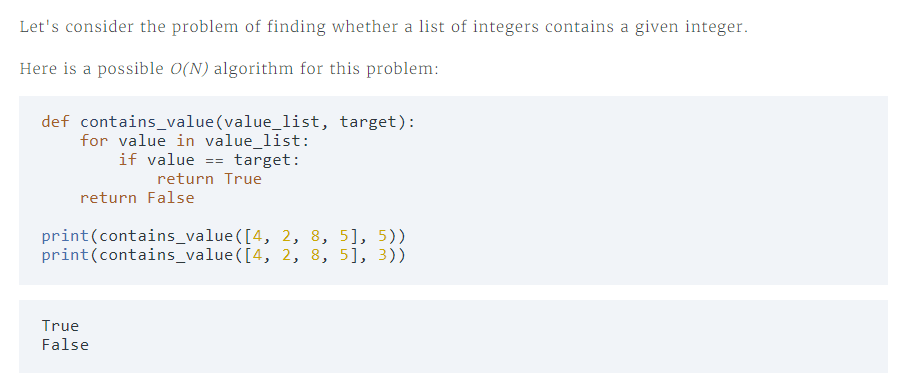

If we don't assume anything about our list (like it being sorted, for instance), then we can prove that it is impossible to have an algorithm with complexity better than O(N).

We learned in the previous file that accessing the value of a specific list index can be done in constant time. In order to be sure about our answer, we need to look at every single element in the list. If we stop before inspecting all list elements, we can never know whether the target was located at one of the indexes that we did not check.

In our previous example, if we stop early — say, at `8` — we will incorrectly conclude that `5` is not present. There is no way of avoiding having to look at all values to be sure about the answer.

Of course, we could be lucky and find the element in the first few indexes. But remember that time complexity is about the worst case. In the worst case, the element is not there or is the last element that we check. In any of those cases, there is no way around looking at every single index.

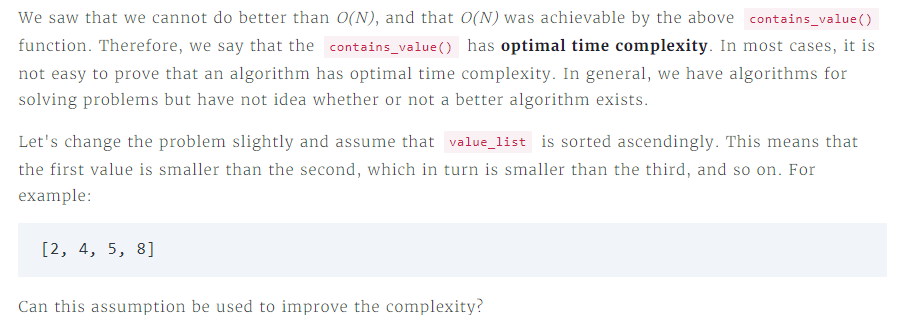

**Task**

A list with 64 integers sorted ascendingly is stored in memory. One of the integers in that list is `42`. The goal of the game is to find the index of that integer inside the list. To play, we can use two commands:

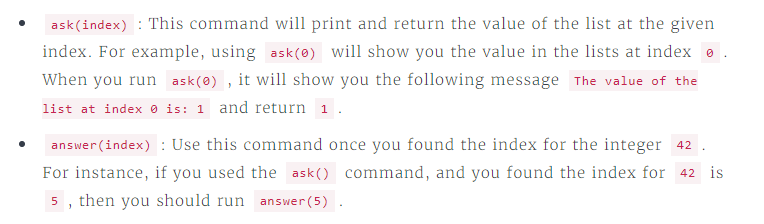

**Answer**

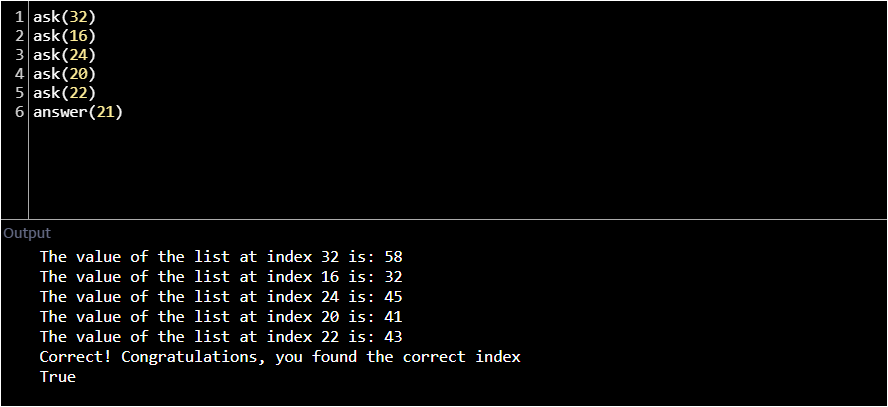

Above, we left with a game to try to discover the index of a value in a sorted list. How did we do?

Even if we did find the answer in the best way possible, hopefully, it helped us gain some intuition about ways in which we can exploit the fact that the list is sorted.

One way to find 42 is to, starting from 0, ask every single index until we hit 42:

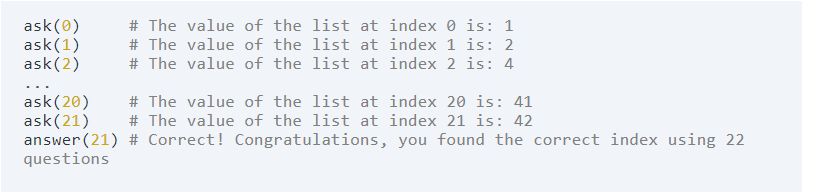

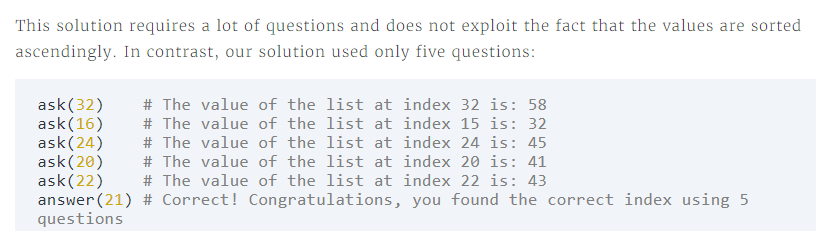

Let's try to understand how we chose the above values in our solution.

We are told that the list is sorted and has 64 elements. The fact that the list is sorted makes it possible for us to deduce a lot of information about where the value 42 is not. For instance, imagine that we start with `ask(10)`:

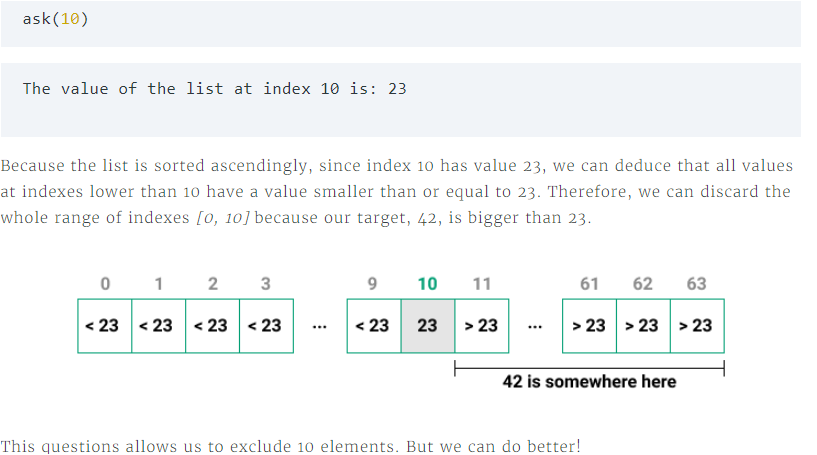

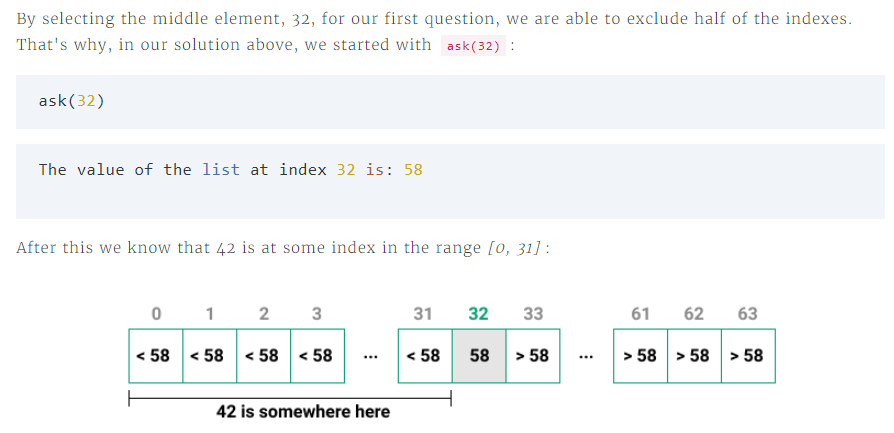

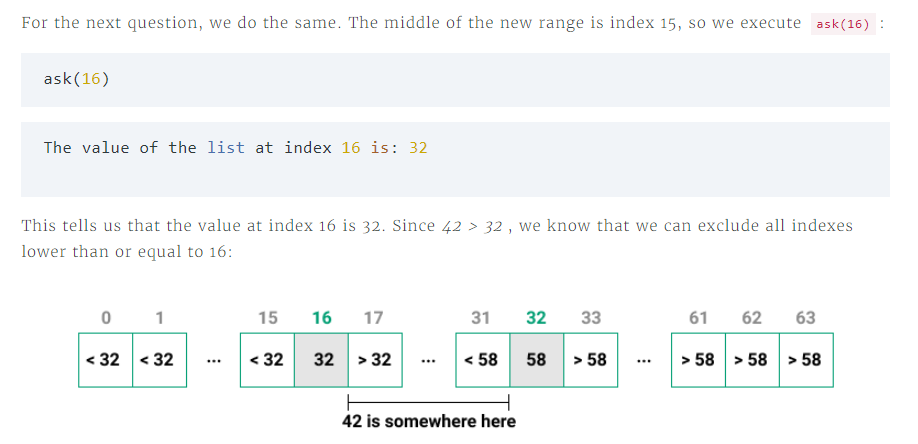

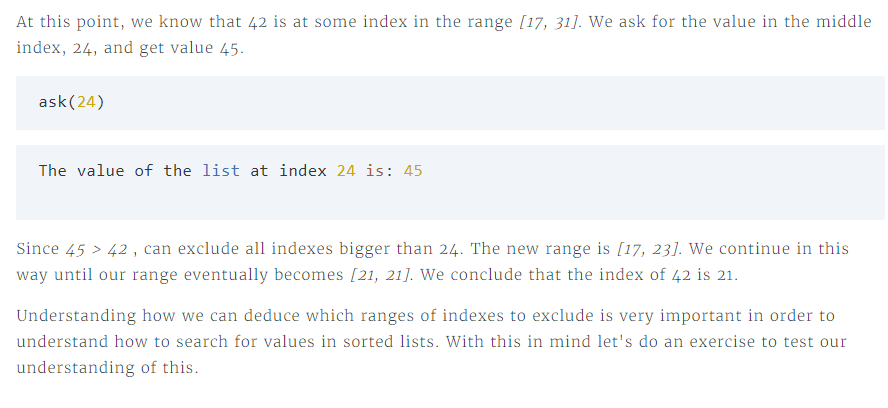

**Task**

A list of `ask()` commands are provided. The target value, in this case, is 75. The goal is to deduce the smallest range of indexes where 75 might be — we'll be able to do that by analyzing the output we'll get from running the four `ask()` commands we provided.

**Answer**

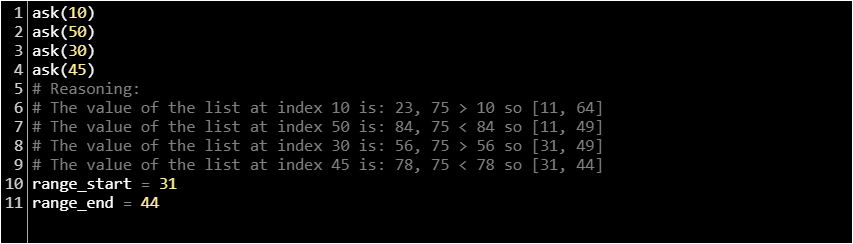

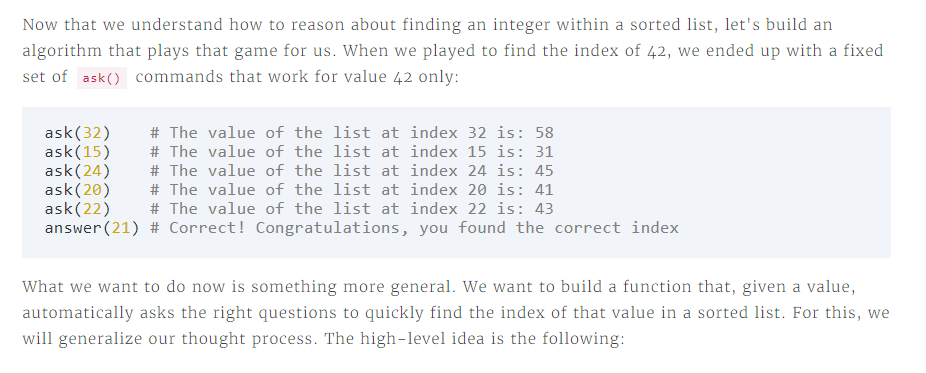

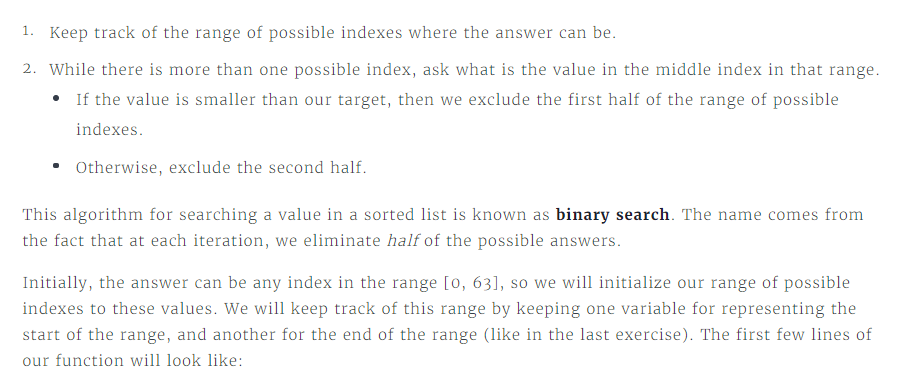

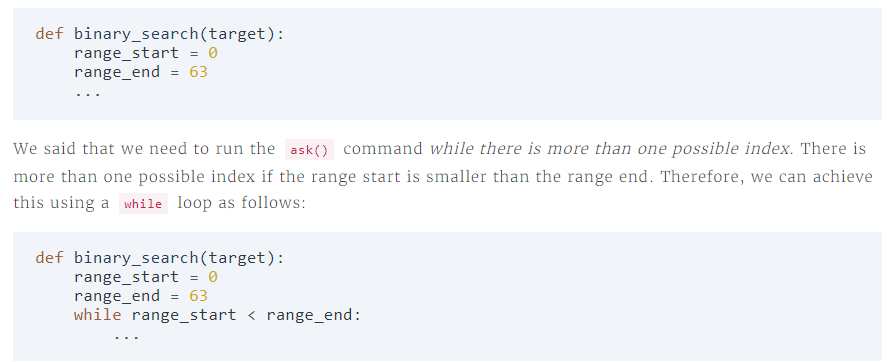

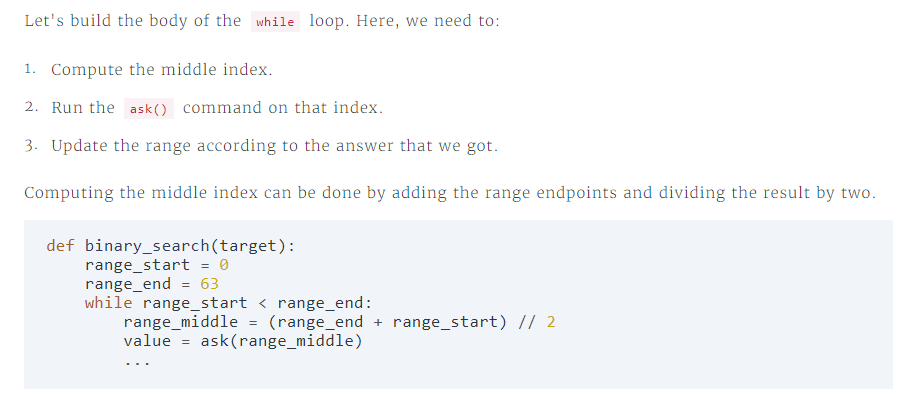

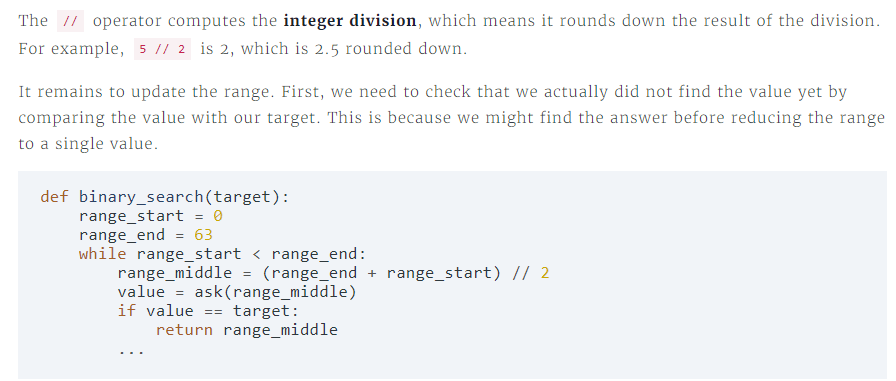

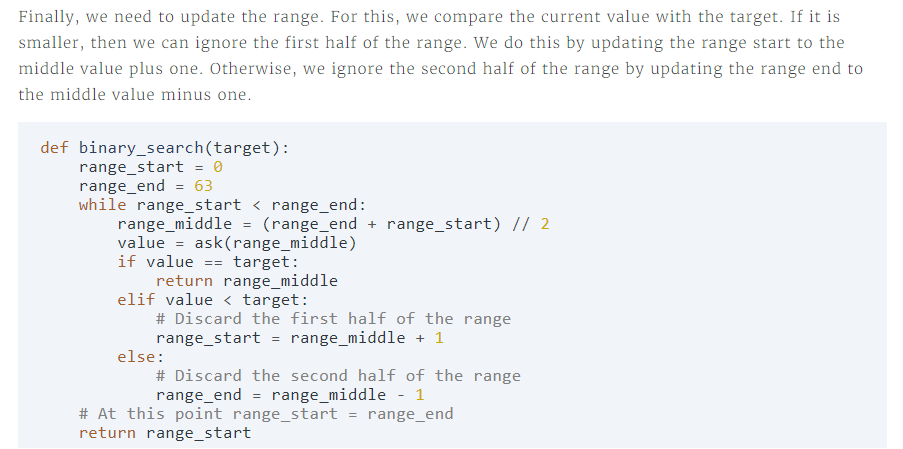

We are done! We now have an algorithm that will play the game and find the index of any target value.

**Task**

1. Call the `binary_search()` function to play the game and find out the index of 32. 
2. Call the `answer()` function by giving it the index that we found.

**Answer**

In [2]:
def binary_search(target):
    range_start = 0
    range_end = 63
    while range_start < range_end:
        range_middle = (range_end + range_start) // 2
        value = ask(range_middle)
        if value == target:
            return range_middle
        elif value < target:
            # Discard the first half of the range
            range_start = range_middle + 1
        else:
            # Discard the second half of the range
            range_end = range_middle - 1
    # At this point range_start = range_end
    return range_start

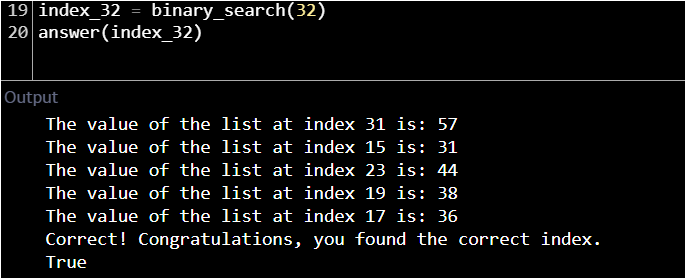

As we can see, our algorithm was able to automatically find the index asking only five questions! Now that we understand how binary search works, let's adapt our code from above into something that is more useful for programming.

The idea is to alter it so that, instead of playing the guessing game, it receives a list and a target value as input and finds the index of that value in the list.

What we think needs to be changed in the code for this? Try to answer this before reading further.

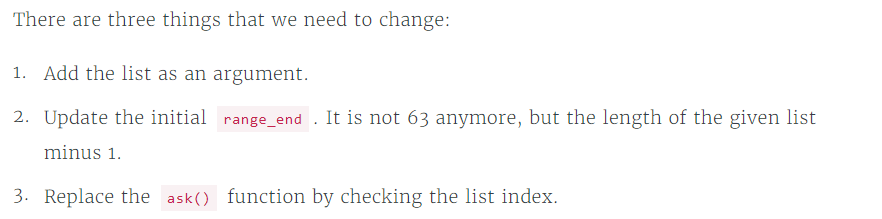

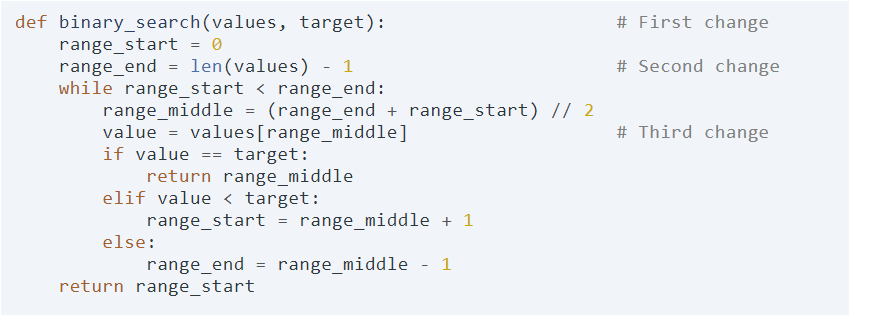

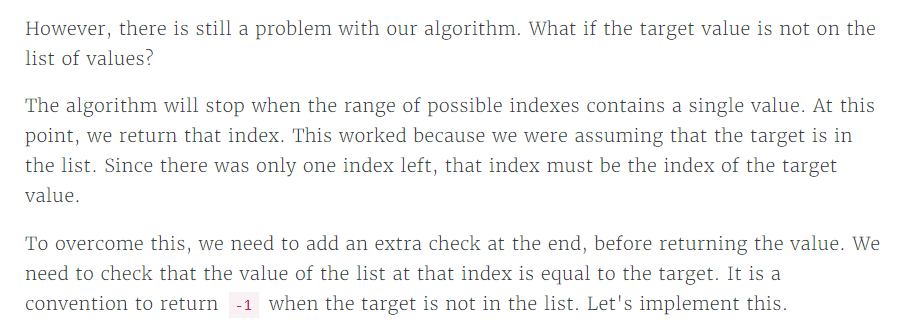

**Task**

The commented code that we learned in this section is provided. Our task is to alter it so that it checks whether the element was found at the end.

**Answer**

In [4]:
# def binary_search(values, target):                     # First change
#     range_start = 0
#     range_end = len(values) - 1                        # Second change
#     while range_start < range_end:
#         range_middle = (range_end + range_start) // 2
#         value = values[range_middle]                   # Third change
#         if value == target:
#             return range_middle
#         elif value < target:
#             range_start = range_middle + 1
#         else:
#             range_end = range_middle - 1
#     # Add our code here
#     return range_start

# Fixed binary search

def binary_search(values, target):                     
    range_start = 0
    range_end = len(values) - 1                        
    while range_start < range_end:
        range_middle = (range_end + range_start) // 2
        value = values[range_middle]                 
        if value == target:
            return range_middle
        elif value < target:
            range_start = range_middle + 1
        else:
            range_end = range_middle - 1
    # Add your code here
    if values[range_start] != target: # Instruction 2
        return -1                     # Instruction 3
    return range_start

values = [1, 2, 4, 5, 8, 10, 13, 15, 17, 20, 23, 24, 25, 26, 30,
          31, 32, 36, 37, 38, 41, 42, 43, 44, 45, 47, 50, 52, 54,
          55, 56, 57, 58, 59, 61, 62, 64, 66, 67, 69, 70, 73, 75,
          76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 90, 91, 92,
          94, 95, 96, 97, 98, 99, 100]

print(binary_search(values, 3))

-1


We now know how we can search a sorted list. When we were playing the number guessing game, we saw that this strategy could find the answer in about five guesses on a list of length 64. This is much better than the linear time algorithm, which can require to lookup the whole list.

But there are still a lot of unanswered questions. Could it happen that binary search also takes linear time in the worst case? If not, what is its time complexity?

This algorithm is harder to analyze than the ones we previously encountered. The main reason is that we use a `while` loop. We cannot really perform a line count in the same way as before because we don't know when the while condition becomes false.

We need to figure out what is the maximum number of times we will execute the body of the `while` loop. To do so, we need to reason about what the `while` condition and what the code is doing.

Let N be the length of the input list. We start with a range of possible indexes that has N elements. At each iteration of the while loop, we are able to eliminate roughly half of the elements.

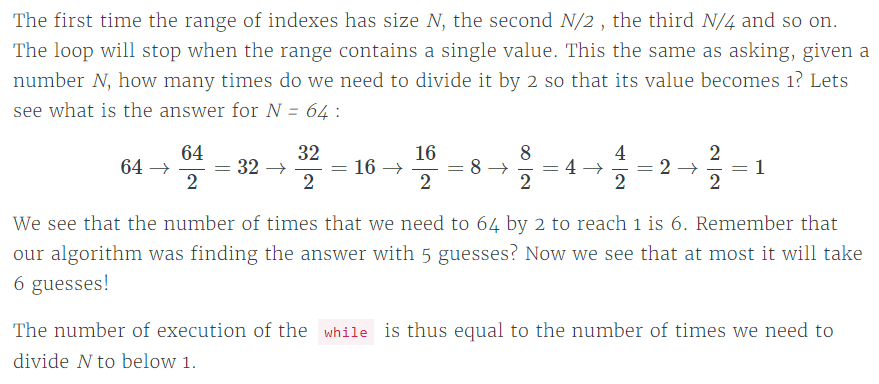

How is this quantity growing as N grows? To answer this, let's do an experiment where we vary the value of N and, for each value, we divide it by 2 and count how many times we need to do it until it becomes lower than 1. We will use these functions to count the number of required divisions:

In [5]:
def num_div_to_reach_1(N):
    div_count = 0
    while N > 1:
        N /= 2
        div_count += 1
    return div_count

**Task**

The `num_div_to_reach_1()` function has been provided. Our task is to use it to plot the number of required divisions for a range of values of N. We also provide with a `plot_list()` function to plot our results.

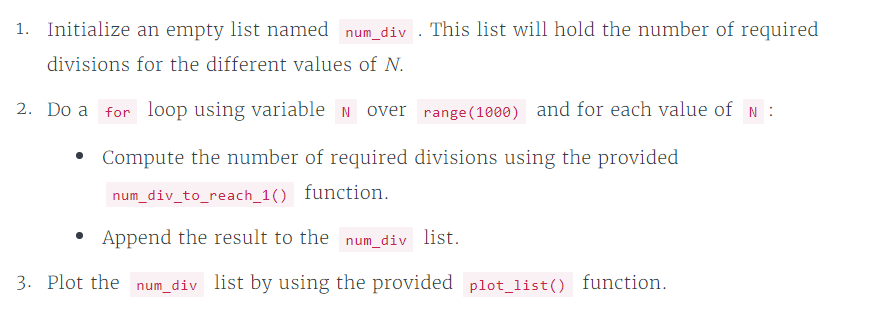

**Answer**

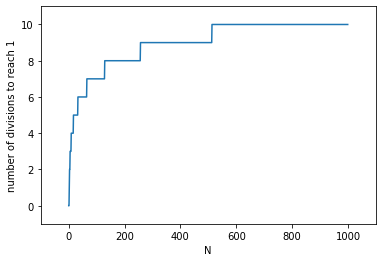

In [7]:
import matplotlib.pyplot as plt

def plot_list(values):
    plt.plot(values)
    plt.ylabel('number of divisions to reach 1')
    plt.xlabel('N')
    plt.margins(x=0.1, y=0.1)
    plt.show()
    
def num_div_to_reach_1(N):
    div_count = 0
    while N > 1:
        N /= 2
        div_count += 1
    return div_count

# Add your code below
num_div = []
for N in range(1000):
    div = num_div_to_reach_1(N)
    num_div.append(div)
    
plot_list(num_div)

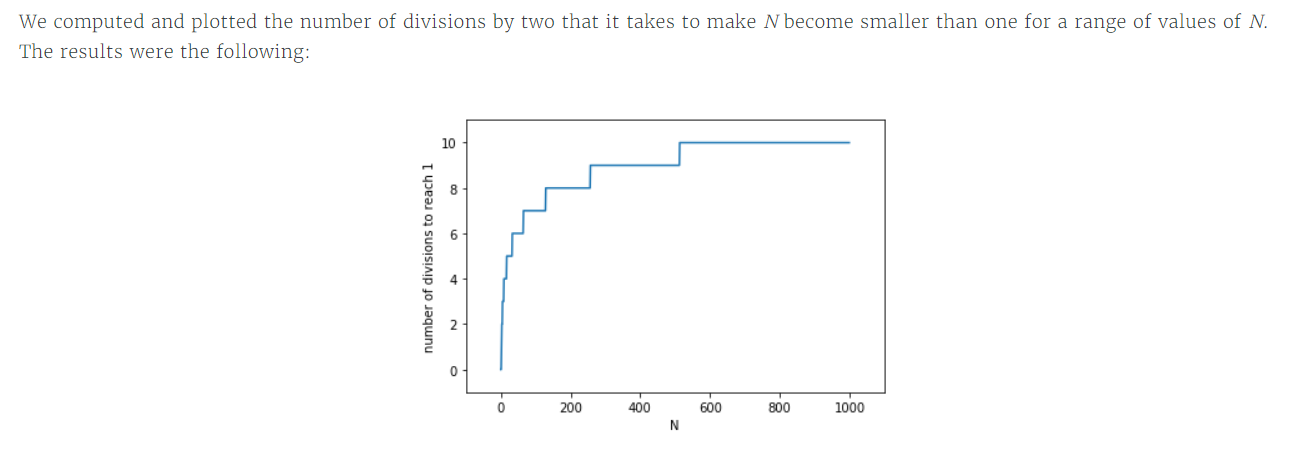

As we can see, even with N close to 1,000 we only need 14 divisions! This shows the power of binary search. By dividing the range of possible answers by 2 at each iteration, it reaches the answer extremely quickly. A linear time algorithm would need to read 1,000 values in the worst case, while the binary search will find the answer by reading at most 14 values in the list.

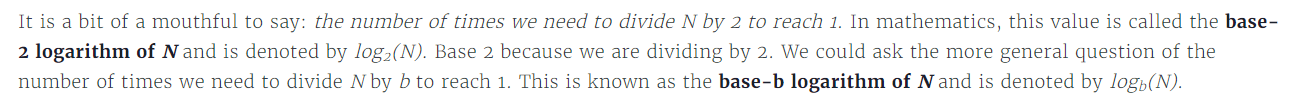

Remember our example of 64? We saw above that we need to divide 64 by 2 six times in order to reach 1. Actually:

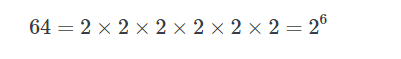

As we can see, the six times that we need to divide appears here as the exponent. In this sense, the base-2 logarithm of 64 is asking what is the exponent k that we need to put so that $2^k$ = 64 ? The answer is 6, as we've just learned.

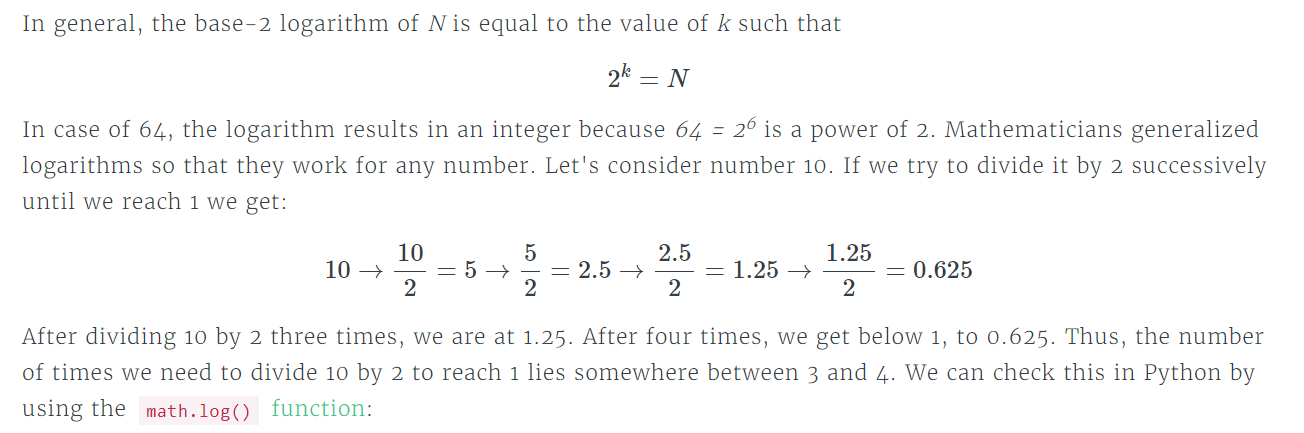

In [8]:
import math
print(math.log(10, 2)) # the second argument is the base

3.3219280948873626


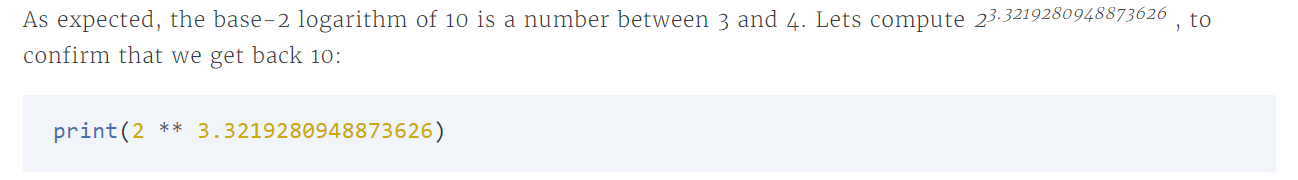

In [9]:
print(2 ** 3.3219280948873626)

10.000000000000002


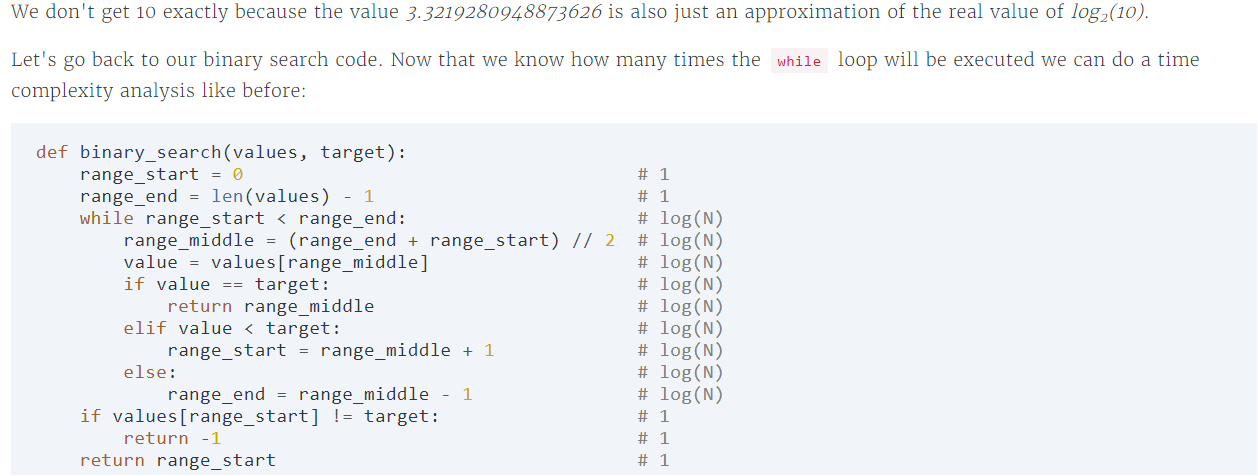

Adding these together, we conclude that the `binary_search()` function has O(log(N)) time complexity. This is called logarithmic time complexity. When working with time complexities, we usually omit the base of the logarithms writing log instead of log2 , to lighten the notation.

Logarithmic time complexities usually arise form algorithms that are able to reduce the search space by some fraction at each iteration. In this example, we could eliminate half of it at each step. These algorithms are extremely fast and should be used whenever applicable.

To better understand how fast logarithmic time algorithms are, imagine that we want to search an element in a sorted list of integers that is that size of our whole hard drive, say 1TB. This list would have roughly 250,000,000,000 elements! The base-2 logarithm of this huge number is close to 38. This means that the `binary_search()` function could find the target element by inspecting at most only 38 list indexes!

We can now complete our plot from the introduction by adding the O(log(N)) complexity to it:

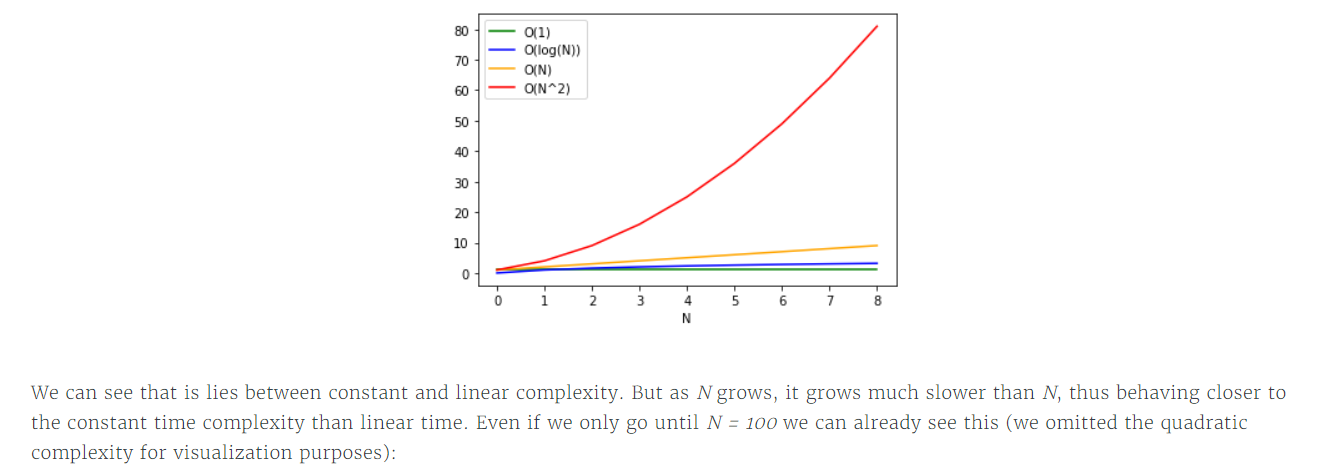

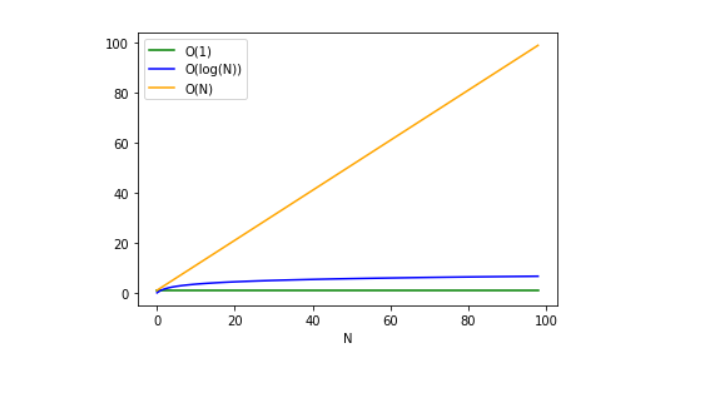

We've learned that binary search is a very efficient way to lookup a value in a sorted list — but it is less general than the linear time search algorithm that we learned at the starting. The reason is that it requires the values to be sorted. However, it is not limited to integers. It works on any data as long as this data can be sorted.

Why not just sort the list if it is not yet sorted? In this way, we can use binary search all the time. This is a good idea, but it has a problem.

We will learn in the next file how to sort a list of values. For now, it is enough to know that sorting has complexity at least O(N). The reason for this is that to sort a list, we need to look at least once at each element. Therefore, no algorithm can sort N values with a complexity lower than O(N).

This means that even if we could sort in linear time, sorting plus doing a binary search would result in an O(N + log(N)) = O(N) algorithm. Therefore, we would lose the benefits of the binary search algorithm.

Before we continue, if we are wondering why we can drop the log(N) term in the previous equality, this is just because N grows faster than log(N) and, we've learned that, in complexity, we can drop slower-growing terms to simplify the expressions.

If, instead of a single value lookup, we need to do several lookups, then sorting becomes interesting since it will make all searches run very efficiently. This kind of strategy is used in databases to ensure that queries run very quickly. 

Let's see an example. The file `netflix2019.csv` contains the list of Netflix releases (movies and TV shows) from 2019. We'll measure the execution times of two movie lookup algorithms. To simplify the experiment, we will only check whether or not the movie is available.

The first algorithm uses a linear search by looping over every row and checking whether the title matches the given title. The second algorithm starts by sorting the releases by title and then answers each query with a binary search. Let's compare the performance of both algorithms for looking up 5,000 titles contained in file `target_titles.txt`.

**Task**

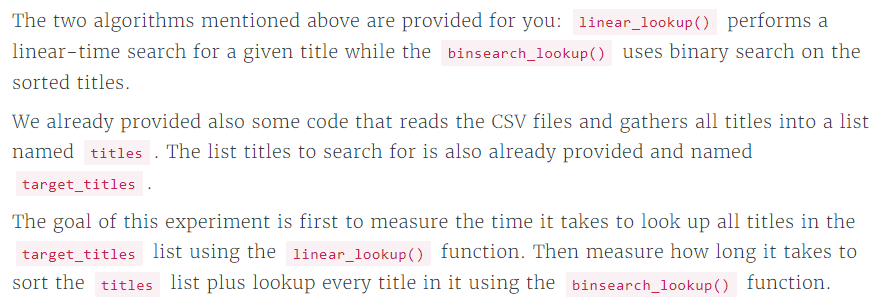

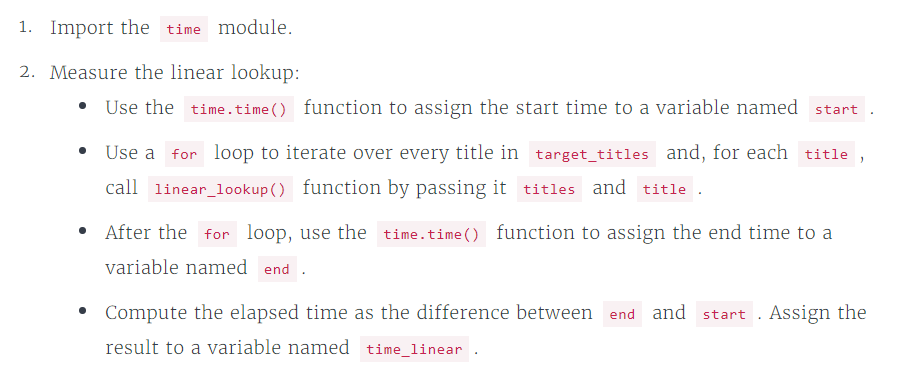

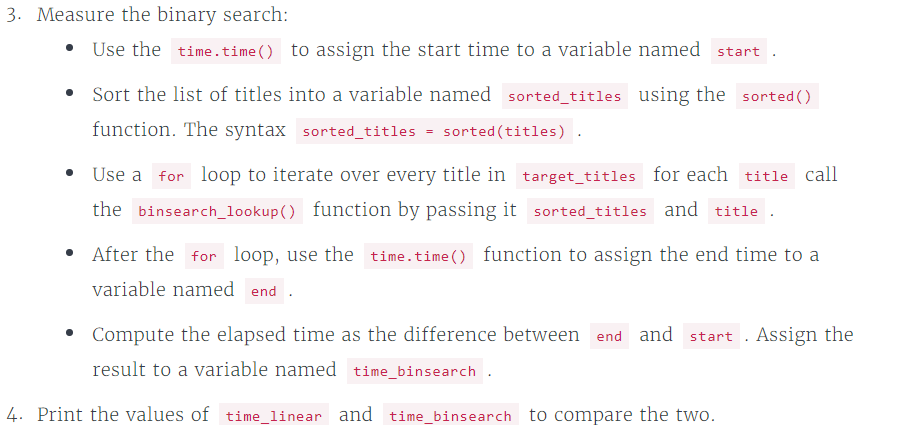

**Answer**

In [35]:
# read the data from the CSV
import csv
with open('netflix2019.csv', mode='r', encoding = "utf8",errors='ignore') as f:
    reader = csv.reader(f)
    next(reader)
    titles = [row[1] for row in list(reader)]

# read target titles into a list
with open('target_titles.txt',encoding = "utf8") as f:
    target_titles = [line.strip() for line in f.readlines()]
    
# linear search algorithm
def linear_lookup(titles, target_title):
    for title in titles:
        if title == target_title:
            return True
    return None

# binary search algorithm modified to return True or False
def binsearch_lookup(titles, target_title):
    range_start = 0                                   
    range_end = len(sorted_titles) - 1                       
    while range_start < range_end:
        range_middle = (range_end + range_start) // 2  
        title = sorted_titles[range_middle]
        if title == target_title:                            
            return True                        
        elif title < target_title:                           
            range_start = range_middle + 1             
        else:                                          
            range_end = range_middle - 1               
    if sorted_titles[range_start] != target_title:                  
        return False                                      
    return True
    

# titles is the list of all titles available on the CSV
# target_titles contains 5,000 titles that we want to lookup
import time

start = time.time()
for title in target_titles:
    linear_lookup(titles, title)
end = time.time()
time_linear = end - start

start = time.time()
sorted_titles = sorted(titles)
for title in target_titles:
    binsearch_lookup(sorted_titles, title)
end = time.time()
time_binsearch = end - start

print(time_linear)
print(time_binsearch)

1.5668857097625732
0.0391845703125


In [43]:
(1.56-0.039)/0.039

39.0

As we saw in above experiment, as soon as we need to perform a more significant number of lookups, we started to save a lot of time by using the binary search algorithm.

When we executed the experiment, we obtained 1.56 seconds using linear search and only 0.039 seconds with binary search. This means that binary search was 39 times faster! We did only 5,000 lookups. In real systems, we perform millions of queries every day, so we can imagine the difference it makes it real-life situations.

In this file, we've learned:

1. About a new type of time complexity called logarithmic time complexity. This kind of complexity usually occurs when the algorithms successively divide the search space in two in order to find the answer.
2. Binary search is a very efficient algorithm to find elements in sorted data.
3. When a lot of queries need to be executed, the cost of preprocessing data to accelerate queries is usually worth it.